# Machine Learning in Python - Group Project 2

**Due Friday, April 14th by 16.00 pm.**

*include contributors names here (such as Name1, Name2, ...)* (Group Name)

## General Setup

In [1]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn modules
import sklearn

In [2]:
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [3]:
# Load data
d = pd.read_csv("hotel.csv")

In [4]:
d.head(3)

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
d['agent'] = d['agent'].fillna(0)
d['company'] = d['company'].fillna(0)
d[['agent', 'company']].head(5)

,agent,company
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,304.0,0.0
4,240.0,0.0


In [7]:
d.loc[d['meal'] == 'Undefined', 'meal'] = 'SC'
len(d[d['meal'].isin(['Undefined'])])

0

In [8]:
d.replace('Undefined', np.nan, inplace = True)

In [9]:
d.isnull().sum()

is_canceled                         0
hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      2
distribution_channel                5
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [10]:
d = d.dropna()
len(d)

118897

In [11]:
import calendar
month_num_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_name_list = [calendar.month_name[i] for i in month_num_list]
d = d.replace(month_name_list, month_num_list)
d.head(3)

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0


In [12]:
cancel_corr = d.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.291995
total_of_special_requests         0.235635
required_car_parking_spaces       0.194784
booking_changes                   0.144662
previous_cancellations            0.109922
is_repeated_guest                 0.085181
company                           0.082308
adults                            0.058383
previous_bookings_not_canceled    0.055494
days_in_waiting_list              0.054015
agent                             0.046548
adr                               0.046200
babies                            0.032521
stays_in_week_nights              0.024111
arrival_date_year                 0.016402
arrival_date_month                0.010306
arrival_date_week_number          0.007466
arrival_date_day_of_month         0.006135
children                          0.004766
stays_in_weekend_nights           0.002624
Name: is_canceled, dtype: float64

In [13]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","meal","market_segment","country",
                "distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]

In [14]:
data = d.drop(cat_features,axis=1)
corr = data.corr()

<AxesSubplot:>

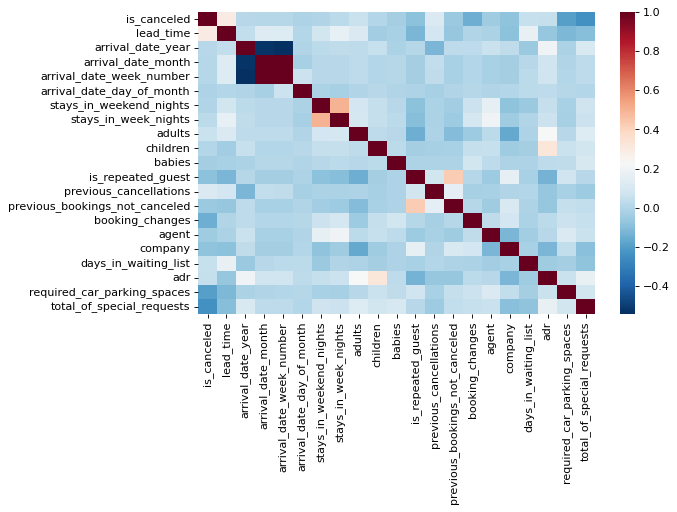

In [16]:
sns.heatmap(corr,cmap = 'RdBu_r', fmt = '.2f')

In [17]:
def cancel_by_group(d, feature_name):
    name_list = d[feature_name].drop_duplicates().values
    total = []
    cancel = []
    for name in name_list:
        total.append(len(d[d[feature_name] == name]))
        cancel.append(len(d[(d[feature_name] == name) & (d['is_canceled'] == 1)]))
    cancel_rate = [round(a / b, 2) for a, b in zip(cancel, total)]
    feature_cancel = pd.DataFrame({feature_name: name_list, 'total_booking': total, 
                               'cancel_rate': cancel_rate})
    sort_value = feature_cancel.sort_values(by = ['total_booking'], ascending = False)
    return sort_value

<AxesSubplot:xlabel='month', ylabel='cancel_rate'>

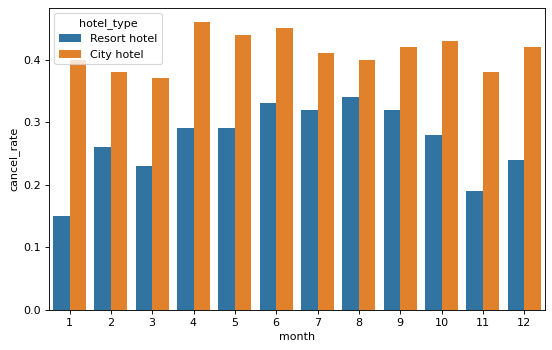

In [18]:
resort_month = cancel_by_group(d[d['hotel'] == 'Resort Hotel'], 'arrival_date_month').sort_values(by = ['arrival_date_month'])
city_month = cancel_by_group(d[d['hotel'] == 'City Hotel'], 'arrival_date_month').sort_values(by = ['arrival_date_month'])
hotel_type = ['']
resort_cancel = pd.DataFrame({'month': resort_month['arrival_date_month'], 
                      'cancel_rate': resort_month['cancel_rate'],
                      'hotel_type': 'Resort hotel'})
city_cancel = pd.DataFrame({'month': city_month['arrival_date_month'], 
                      'cancel_rate': city_month['cancel_rate'],
                      'hotel_type': 'City hotel'})
month_cancel = pd.concat([resort_cancel, city_cancel], ignore_index=True)
sns.barplot(x = "month", y = "cancel_rate" , hue="hotel_type", data=month_cancel)

In [19]:
cg_features = ["hotel","meal","market_segment","country",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

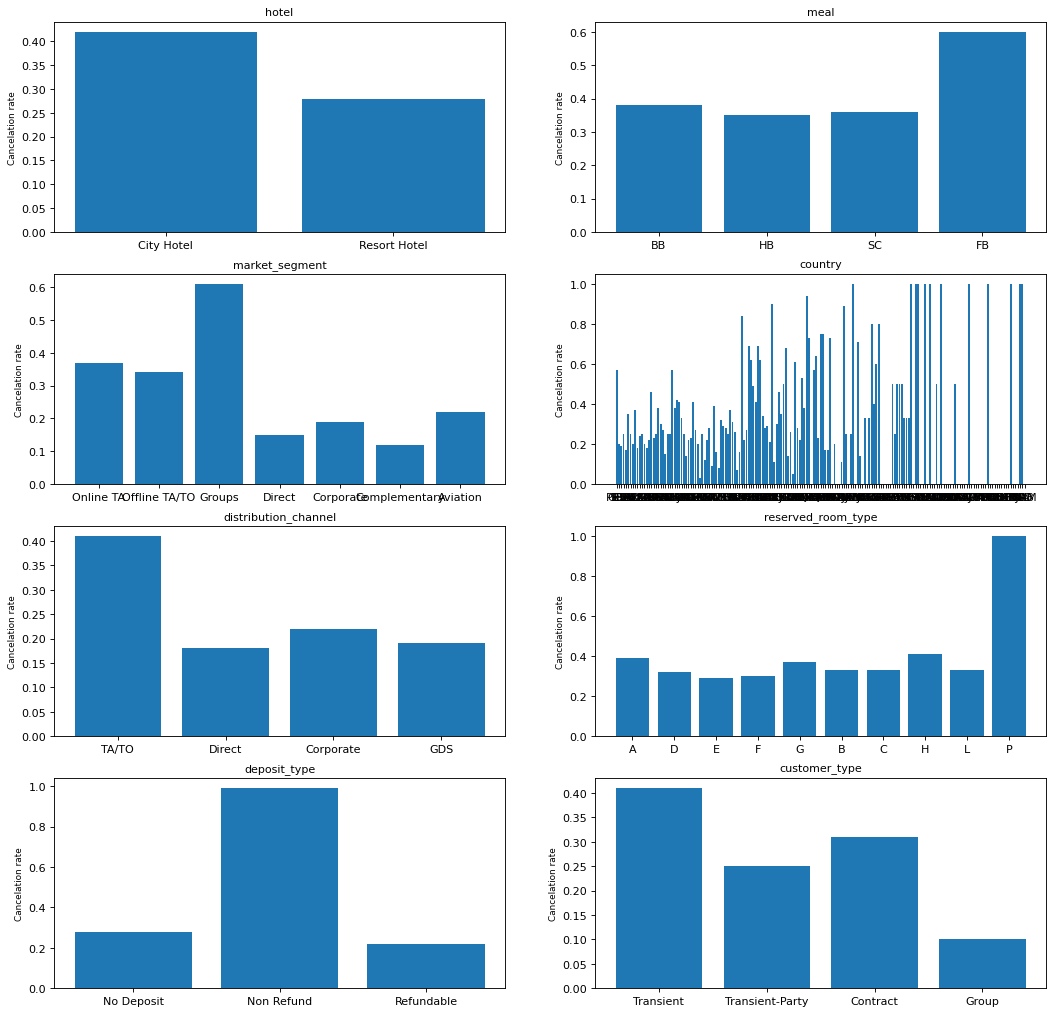

In [20]:
fig = plt.figure(figsize=(4*4, 4*4))
for i in range(len(cg_features)):
    ax = fig.add_subplot(4, 2, i+1)
    sort_value = cancel_by_group(d, cg_features[i])
    ax.bar(x=sort_value.iloc[:,0], height=sort_value.iloc[:,2])
    plt.title(cg_features[i], fontsize=10)
    plt.ylabel("Cancelation rate", fontsize=8)

In [32]:
cancel_by_group(d, 'market_segment')

,market_segment,total_booking,cancel_rate
2,Online TA,56402,0.37
3,Offline TA/TO,24160,0.34
5,Groups,19806,0.61
0,Direct,12447,0.15
1,Corporate,5111,0.19
4,Complementary,734,0.12
6,Aviation,237,0.22


In [34]:
# see cancel rate of countries with large number of total_booking
country_cancel = cancel_by_group(d, 'country')

In [49]:
sum(country_cancel[country_cancel['total_booking'] > 1000]['total_booking'])

108188

In [50]:
len(country_cancel[country_cancel['total_booking'] > 1000])

15

In [53]:
lt_c = cancel_by_group(d, 'lead_time').sort_values(by = ['lead_time'])

In [69]:
lt_c

,lead_time,total_booking,cancel_rate
5,0,6223,0.07
40,1,3393,0.09
49,2,2033,0.10
39,3,1802,0.10
58,4,1696,0.10
...,...,...,...
452,622,17,1.00
432,626,30,1.00
453,629,17,1.00
251,709,1,0.00


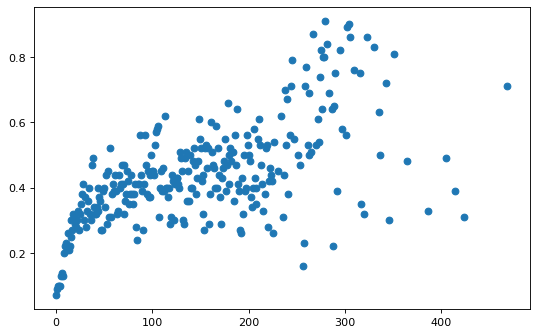

In [84]:
lt_c1 = lt_c[lt_c['total_booking']>100]
plt.scatter(lt_c1['lead_time'], lt_c1['cancel_rate'])

In [22]:
cancel_by_group(d, "deposit_type")
# detailed analysis

,deposit_type,total_booking,cancel_rate
0,No Deposit,104162,0.28
2,Non Refund,14573,0.99
1,Refundable,162,0.22


In [23]:
data_deposit = d.groupby("deposit_type").mean()
data_deposit

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
deposit_type,,,,,,,,,,,,,,,,,,,,,
No Deposit,0.284528,89.040898,2016.175208,6.545928,27.138736,15.817736,0.971708,2.559225,1.864912,0.118805,...,0.035886,0.041848,0.148739,0.249803,78.757042,10.978677,1.526334,103.724273,0.070429,0.652071
Non Refund,0.993618,212.928018,2016.032457,6.621698,27.434639,15.596034,0.622315,2.090235,1.811226,0.000618,...,0.004392,0.411858,0.010636,0.012489,47.514101,6.221780,7.999931,89.988000,0.000069,0.001784
Refundable,0.222222,152.098765,2016.141975,4.833333,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,...,0.024691,0.000000,0.018519,0.592593,56.185185,133.666667,9.586420,76.209753,0.123457,0.141975


In [24]:
data_hotel = d.groupby("hotel").mean()
data_hotel

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
hotel,,,,,,,,,,,,,,,,,,,,,
City Hotel,0.417089,109.740183,2016.174535,6.555547,27.173564,15.787824,0.795339,2.182896,1.851126,0.091397,...,0.025624,0.079771,0.132418,0.187435,25.265870,6.729654,3.227914,105.326470,0.024375,0.547035
Resort Hotel,0.279758,93.438616,2016.123879,6.547544,27.152494,15.827301,1.196363,3.141533,1.872939,0.129840,...,0.044804,0.101907,0.130067,0.288774,174.299331,18.239929,0.533956,95.347117,0.136987,0.621013


In [25]:
d = d.drop(['arrival_date_week_number', 'arrival_date_year'],axis=1)

In [26]:
# "assigned_room_type" 

For the details about data set;

- please check the Project Description pdf file and related article from the Learn page. 

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client).* 

- If you use any additional data sources, you should introduce them here and discuss why they were included.

- Briefly outline the approaches being used and the conclusions that you are able to draw.

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling.* 

- Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. 
- Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data.*

- Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. 
- Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

**All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.**

## Feature engineering

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model.*

- You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. 
- At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.

*For example if you considered a logistic regression model, a classification tree, and a SVC model and ultimately settled on the logistic regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the logistic regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

**This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.**

## 4. Discussion & Conclusions


*In this section you should provide a general overview of **your final model**, its **performance**, and **reliability**.* 

Your report must include the following:

* Some discussion of the features that are most important for predicting a cancelation - we do not need discussion of specific coefficient values but direction of the effect should be clear (e.g. the earlier a booking is made the more likely it is to be canceled).

* A validated assessment of your model's performance, but this must be specifically discussed in the context of bookings and running a hotel. 

* It is not sufficient to report summary statistics like the accuracy or AUC - you must address the perfomance in terms of potential gains and losses for the hotel (e.g. think about what happens if your model predicts a cancelation that does not actually occur and a room ends up being double booked or vice versa). 

* Explain why you think your particular model would or would not be economically viable.

## 5. References

*In this section, you should present a list of external sources (except the course materials) that you used during the project, if any*

- Additional data sources can be cited here, in addition to related python documentations, any other webpage sources that you benefited from